In [1]:
import pandas as pd
import numpy as np
import math
from lineardatamodels import *
from lineartoydata import *
from lineardatatools import *
import torch.distributions as dist
%load_ext autoreload
%autoreload 2

In [2]:
c_x = np.array([1,2])
s_x = np.array([0.5,0.7])
c_t = np.array([0.5])
s_t = np.array([1])
c_yz = np.array([0.6])
c_yt = np.array([1])
s_y = np.array([1])

In [3]:
%autoreload 2
BATCH_SIZE = 500
num_samples = 5000
df = linear_data_df(num_samples, c_x, c_t, c_yz, c_yt, s_x, s_t, s_y)
dataset = LinearDataset(df)
dataloader = LinearDataLoader(dataset, validation_split=0.0)
train_loader, test_loader = dataloader.get_loaders(batch_size=BATCH_SIZE)
#dummy test loader
test_loader, _ = LinearDataLoader(LinearDataset(df[:1]), validation_split=0.0).get_loaders(batch_size=1)

Training Results - Epoch 1 - y_reconc_loss: 1014.1027 x_reconc_loss: 1895.7468 t_reconc_loss: 765.7343 kld_loss: 7.8102 total_loss: 3683.3939 learning rate: 0.0487
Training Results - Epoch 2 - y_reconc_loss: 1002.1735 x_reconc_loss: 1868.3230 t_reconc_loss: 766.7324 kld_loss: 2.6948 total_loss: 3639.9238 learning rate: 0.0475
Training Results - Epoch 3 - y_reconc_loss: 962.5744 x_reconc_loss: 1858.2659 t_reconc_loss: 764.5655 kld_loss: 6.1127 total_loss: 3591.5186 learning rate: 0.0462
Training Results - Epoch 4 - y_reconc_loss: 829.8049 x_reconc_loss: 1857.2840 t_reconc_loss: 764.9839 kld_loss: 7.2234 total_loss: 3459.2962 learning rate: 0.0450
Training Results - Epoch 5 - y_reconc_loss: 807.8849 x_reconc_loss: 1857.0920 t_reconc_loss: 762.8872 kld_loss: 5.7995 total_loss: 3433.6635 learning rate: 0.0439
Training Results - Epoch 6 - y_reconc_loss: 787.2976 x_reconc_loss: 1856.6029 t_reconc_loss: 763.9179 kld_loss: 3.3184 total_loss: 3411.1368 learning rate: 0.0428
Training Results - E

Training Results - Epoch 51 - y_reconc_loss: 706.5943 x_reconc_loss: 928.0357 t_reconc_loss: 712.3229 kld_loss: 634.3202 total_loss: 2981.2732 learning rate: 0.0132
Training Results - Epoch 52 - y_reconc_loss: 707.9869 x_reconc_loss: 949.1895 t_reconc_loss: 711.0651 kld_loss: 626.5352 total_loss: 2994.7767 learning rate: 0.0129
Training Results - Epoch 53 - y_reconc_loss: 706.1866 x_reconc_loss: 922.7631 t_reconc_loss: 714.2552 kld_loss: 634.7821 total_loss: 2977.9869 learning rate: 0.0126
Training Results - Epoch 54 - y_reconc_loss: 704.0529 x_reconc_loss: 935.8415 t_reconc_loss: 714.2753 kld_loss: 628.7405 total_loss: 2982.9102 learning rate: 0.0122
Training Results - Epoch 55 - y_reconc_loss: 703.2992 x_reconc_loss: 921.7508 t_reconc_loss: 711.8550 kld_loss: 643.2464 total_loss: 2980.1514 learning rate: 0.0119
Training Results - Epoch 56 - y_reconc_loss: 704.6472 x_reconc_loss: 937.0763 t_reconc_loss: 713.4651 kld_loss: 623.5731 total_loss: 2978.7617 learning rate: 0.0116
Training R

Training Results - Epoch 101 - y_reconc_loss: 703.6216 x_reconc_loss: 912.3011 t_reconc_loss: 711.1342 kld_loss: 647.2099 total_loss: 2974.2668 learning rate: 0.0036
Training Results - Epoch 102 - y_reconc_loss: 704.5270 x_reconc_loss: 919.3810 t_reconc_loss: 710.1002 kld_loss: 641.5835 total_loss: 2975.5917 learning rate: 0.0035
Training Results - Epoch 103 - y_reconc_loss: 703.4448 x_reconc_loss: 916.9370 t_reconc_loss: 712.0692 kld_loss: 643.3862 total_loss: 2975.8371 learning rate: 0.0034
Training Results - Epoch 104 - y_reconc_loss: 703.6129 x_reconc_loss: 912.8871 t_reconc_loss: 709.9255 kld_loss: 650.8758 total_loss: 2977.3012 learning rate: 0.0033
Training Results - Epoch 105 - y_reconc_loss: 705.9445 x_reconc_loss: 912.1289 t_reconc_loss: 712.3398 kld_loss: 642.4406 total_loss: 2972.8539 learning rate: 0.0032
Training Results - Epoch 106 - y_reconc_loss: 705.5494 x_reconc_loss: 909.4241 t_reconc_loss: 712.5790 kld_loss: 647.6285 total_loss: 2975.1810 learning rate: 0.0032
Trai

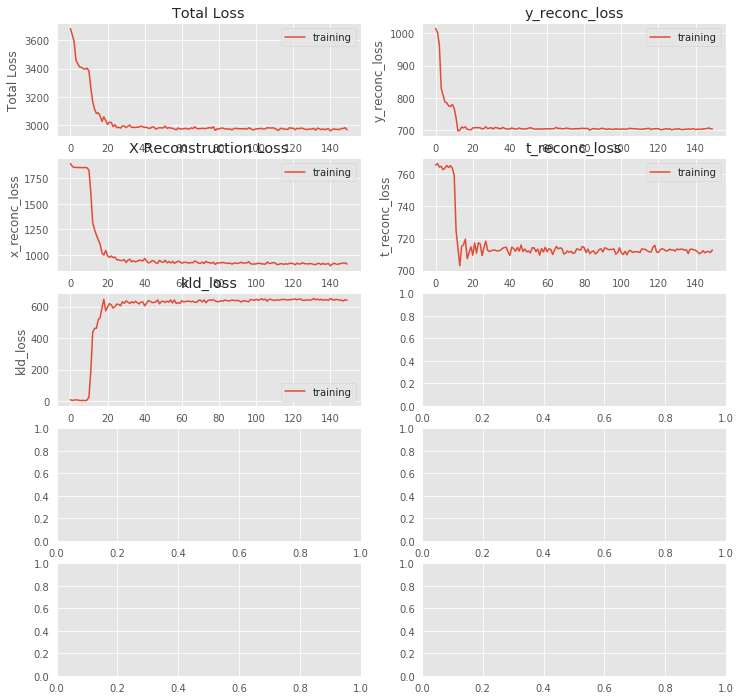

In [10]:
#Running the model
device = 'cpu'
model = run_cevae(num_epochs=150, lr_start=0.05, lr_end=0.001,
        train_loader=train_loader, test_loader=test_loader, input_dim=2,
        plot_curves=True, print_logs=True, device=device, z_dim=2, q_z_xty_nn=True, p_y_zt_nn=True,
        p_x_z_nn = True, p_t_z_nn = True, p_y_zt_std = True, p_x_z_std = True, p_t_z_std = True)

In [164]:
z = torch.cat([torch.randn((5000,2))], axis=1)
t = dist.Normal(loc=model.decoder.t_nn(z), scale=torch.zeros((5000,1))).sample()
zt = torch.cat([z,t],axis=1)
y_mean = model.decoder.y_nn(zt)
y = dist.Normal(loc=y_mean,scale=0).sample()
#model.decoder.y_nn.weight
np.cov(t.squeeze().detach().numpy(), y.squeeze().detach().numpy())

array([[0.37404578, 0.74513743],
       [0.74513743, 1.50306039]])

In [186]:
model.decoder.y_nn.weight

Parameter containing:
tensor([[-0.4678,  0.0029,  1.1245]], requires_grad=True)

In [166]:
cov.loc['t','y']

1.571449469757648

In [187]:
cov = df.cov()
(cov.loc['t','y'] * cov.loc['x0','x1'] - cov.loc['y','x1'] * cov.loc['x0','t']) \
    / (cov.loc['t','t'] * cov.loc['x0','x1'] - cov.loc['x0','t'] * cov.loc['t','x1'])

1.1242565305717114